In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\TaxiFare.csv')
df.head()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1

In [4]:
df.tail()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
49995           40.748531            -74.016899            40.705993   
49996           40.768211            -73.987366            40.760597   
49997           40.739428            -73.998108            40.759483   
49998           40.777567            -73.953450            40.779687   
49999           40.763805            -73.932603            40.763805   

       no_of_passenger  
49995                1  
49996                1  
49997                1  
49998                2  
49999                1

In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.drop(['unique_id'],axis=1,inplace=True)

In [8]:
df.shape

(50000, 7)

In [9]:
df.value_counts()

amount   date_time_of_pickup      longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  no_of_passenger
 200.00  2012-02-26 03:24:00 UTC  -73.954922            41.391042          -73.954918             41.391042           1                  1
 6.50    2015-06-22 10:08:27 UTC  -73.966171            40.764702          -73.956291             40.775555           1                  1
 6.60    2009-02-10 05:39:02 UTC  -73.958358            40.775646          -73.975842             40.762344           1                  1
         2009-01-28 21:43:18 UTC  -73.962795            40.794287          -73.952227             40.809534           2                  1
         2009-01-28 21:01:16 UTC  -73.977806            40.752138          -74.000061             40.761120           1                  1
         2009-01-24 22:53:01 UTC  -73.994021            40.751290          -73.972530             40.749632           1                  1
         2009-01-24 22:24:43 UTC

In [10]:
df['no_of_passenger'].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

In [11]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [12]:
df.date_time_of_pickup=pd.to_datetime(df.date_time_of_pickup,errors='coerce')

In [13]:
df.head()

amount       date_time_of_pickup  longitude_of_pickup  latitude_of_pickup  \
0     4.5 2009-06-15 17:26:21+00:00           -73.844311           40.721319   
1    16.9 2010-01-05 16:52:16+00:00           -74.016048           40.711303   
2     5.7 2011-08-18 00:35:00+00:00           -73.982738           40.761270   
3     7.7 2012-04-21 04:30:42+00:00           -73.987130           40.733143   
4     5.3 2010-03-09 07:51:00+00:00           -73.968095           40.768008   

   longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
0            -73.841610            40.712278                1  
1            -73.979268            40.782004                1  
2            -73.991242            40.750562                2  
3            -73.991567            40.758092                1  
4            -73.956655            40.783762                1

In [14]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [15]:
df=df.assign(hour=df.date_time_of_pickup.dt.hour,day=df.date_time_of_pickup.dt.day,month=df.date_time_of_pickup.dt.month,year=df.date_time_of_pickup.dt.year,dayofweek=df.date_time_of_pickup.dt.dayofweek)


In [16]:
from math import radians,cos,sin,sqrt,asin

In [17]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [18]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
hour                                  int64
day                                   int64
month                                 int64
year                                  int64
dayofweek                             int64
dtype: object

In [19]:
df['travel_dist_km'] = distance_transform(df['longitude_of_pickup'].to_numpy(),
                                                df['latitude_of_pickup'].to_numpy(),
                                                df['longitude_of_dropoff'].to_numpy(),
                                                df['latitude_of_dropoff'].to_numpy())

In [20]:
df.head()

amount       date_time_of_pickup  longitude_of_pickup  latitude_of_pickup  \
0     4.5 2009-06-15 17:26:21+00:00           -73.844311           40.721319   
1    16.9 2010-01-05 16:52:16+00:00           -74.016048           40.711303   
2     5.7 2011-08-18 00:35:00+00:00           -73.982738           40.761270   
3     7.7 2012-04-21 04:30:42+00:00           -73.987130           40.733143   
4     5.3 2010-03-09 07:51:00+00:00           -73.968095           40.768008   

   longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  hour  day  \
0            -73.841610            40.712278                1    17   15   
1            -73.979268            40.782004                1    16    5   
2            -73.991242            40.750562                2     0   18   
3            -73.991567            40.758092                1     4   21   
4            -73.956655            40.783762                1     7    9   

   month  year  dayofweek  travel_dist_km  
0      6  2009          0        1.030764  
1      1  2010          1        8.450134  
2      8  2011          3        1.389525  
3      4  2012          5        2.799270  
4      3  2010          1        1.999157

In [21]:
df=df.drop('date_time_of_pickup',axis=1)

In [22]:
df.head()

amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0     4.5           -73.844311           40.721319            -73.841610   
1    16.9           -74.016048           40.711303            -73.979268   
2     5.7           -73.982738           40.761270            -73.991242   
3     7.7           -73.987130           40.733143            -73.991567   
4     5.3           -73.968095           40.768008            -73.956655   

   latitude_of_dropoff  no_of_passenger  hour  day  month  year  dayofweek  \
0            40.712278                1    17   15      6  2009          0   
1            40.782004                1    16    5      1  2010          1   
2            40.750562                2     0   18      8  2011          3   
3            40.758092                1     4   21      4  2012          5   
4            40.783762                1     7    9      3  2010          1   

   travel_dist_km  
0        1.030764  
1        8.450134  
2        1.389525  
3        2.799270  
4        1.999157

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
 11  travel_dist_km        50000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.6 MB


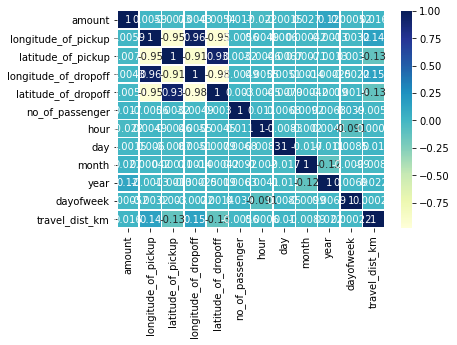

In [24]:
corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

In [25]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'hour', 'day', 'month', 'year', 'dayofweek', 'travel_dist_km'],
      dtype='object')

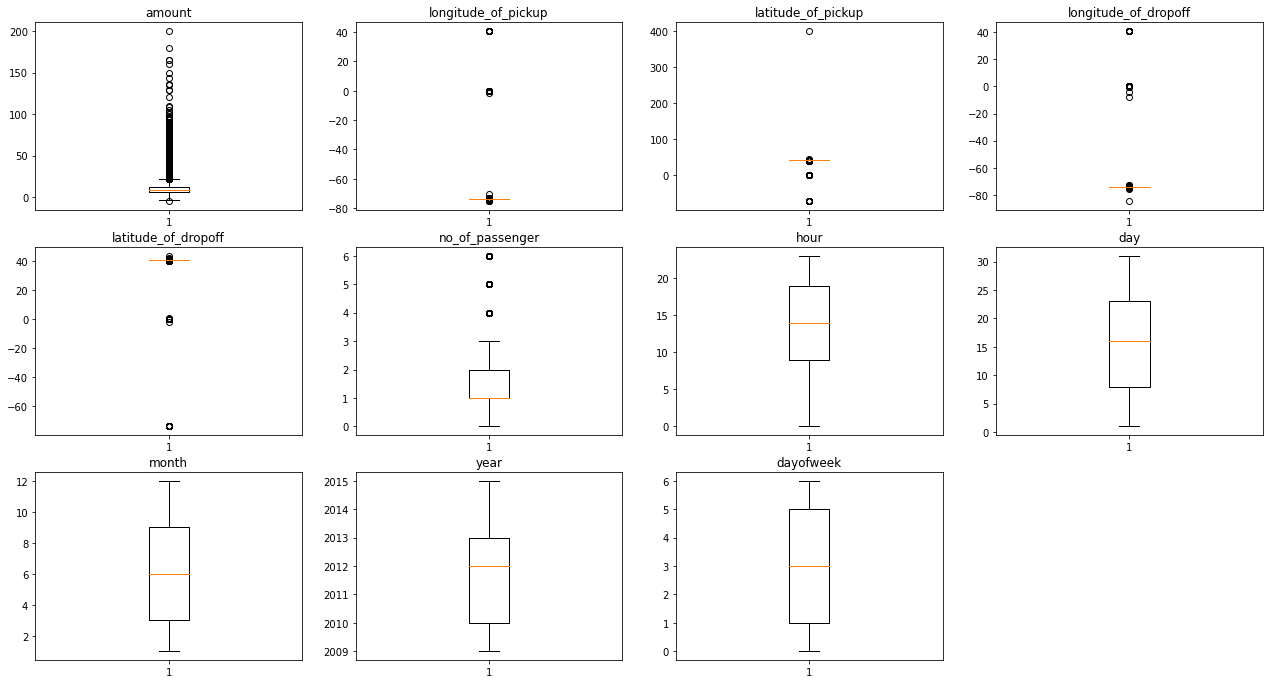

In [26]:
outliers=['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'hour', 'day', 'month', 'year', 'dayofweek', 'travel_dist_km']
plt.figure(figsize=(22,20))
for i in range(0,11):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[outliers[i]])
    plt.title(outliers[i])

In [27]:
df.describe()

amount  longitude_of_pickup  latitude_of_pickup  \
count  50000.000000         50000.000000        50000.000000   
mean      11.364171           -72.509756           39.933759   
std        9.685557            10.393860            6.224857   
min       -5.000000           -75.423848          -74.006893   
25%        6.000000           -73.992062           40.734880   
50%        8.500000           -73.981840           40.752678   
75%       12.500000           -73.967148           40.767360   
max      200.000000            40.783472          401.083332   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  \
count          50000.000000         50000.000000     50000.000000   
mean             -72.504616            39.926251         1.667840   
std               10.407570             6.014737         1.289195   
min              -84.654241           -74.006377         0.000000   
25%              -73.991152            40.734371         1.000000   
50%              -73.980082            40.753372         1.000000   
75%              -73.963584            40.768167         2.000000   
max               40.851027            43.415190         6.000000   

               hour           day         month          year     dayofweek  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      13.489080     15.672040      6.273300   2011.739260      3.029980   
std        6.506935      8.660789      3.461157      1.862639      1.956936   
min        0.000000      1.000000      1.000000   2009.000000      0.000000   
25%        9.000000      8.000000      3.000000   2010.000000      1.000000   
50%       14.000000     16.000000      6.000000   2012.000000      3.000000   
75%       19.000000     23.000000      9.000000   2013.000000      5.000000   
max       23.000000     31.000000     12.000000   2015.000000      6.000000   

       travel_dist_km  
count    50000.000000  
mean        18.508946  
std        355.564309  
min          0.000000  
25%          1.223146  
50%          2.120114  
75%          3.895570  
max       8667.818812

In [28]:
print(df['amount'].quantile(0.10))
print(df['amount'].quantile(0.90))


4.5
20.5


In [29]:
df['amount']=np.where(df['amount']<4.5,4.5,df['amount'])
df['amount']=np.where(df['amount']>20.5,20.5,df['amount'])



In [30]:
print(df['longitude_of_pickup'].quantile(0.10))
print(df['longitude_of_pickup'].quantile(0.90))


-74.00278030000001
-73.950992


In [31]:
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']<-74.00278030000001,-74.00278030000001,df['longitude_of_pickup'])
df['longitude_of_pickup']=np.where(df['longitude_of_pickup']>-73.950992,-73.950992,df['longitude_of_pickup'])



In [32]:
print(df['latitude_of_pickup'].quantile(0.10))
print(df['latitude_of_pickup'].quantile(0.90))


40.7179816
40.7797832


In [33]:
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']<40.7179816,40.7179816,df['latitude_of_pickup'])
df['latitude_of_pickup']=np.where(df['latitude_of_pickup']>40.7797832,40.7797832,df['latitude_of_pickup'])


In [34]:
print(df['longitude_of_dropoff'].quantile(0.10))
print(df['longitude_of_dropoff'].quantile(0.90))


-74.00271110000001
-73.9447296


In [35]:
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']<-74.00271110000001,-74.00271110000001,df['longitude_of_dropoff'])
df['longitude_of_dropoff']=np.where(df['longitude_of_dropoff']>-73.9447296,-73.9447296,df['longitude_of_dropoff'])


In [36]:
print(df['latitude_of_dropoff'].quantile(0.10))
print(df['latitude_of_dropoff'].quantile(0.90))


40.7132755
40.782902


In [37]:
df['latitude_of_dropoff']=np.where(df['latitude_of_dropoff']<40.7132755,40.7132755,df['latitude_of_dropoff'])
df['latitude_of_dropoff']=np.where(df['latitude_of_dropoff']>40.782902,40.782902,df['latitude_of_dropoff'])


In [38]:
print(df['no_of_passenger'].quantile(0.10))
print(df['no_of_passenger'].quantile(0.90))


1.0
4.0


In [39]:
df['no_of_passenger']=np.where(df['no_of_passenger']<1,1,df['no_of_passenger'])
df['no_of_passenger']=np.where(df['no_of_passenger']>4,4,df['no_of_passenger'])


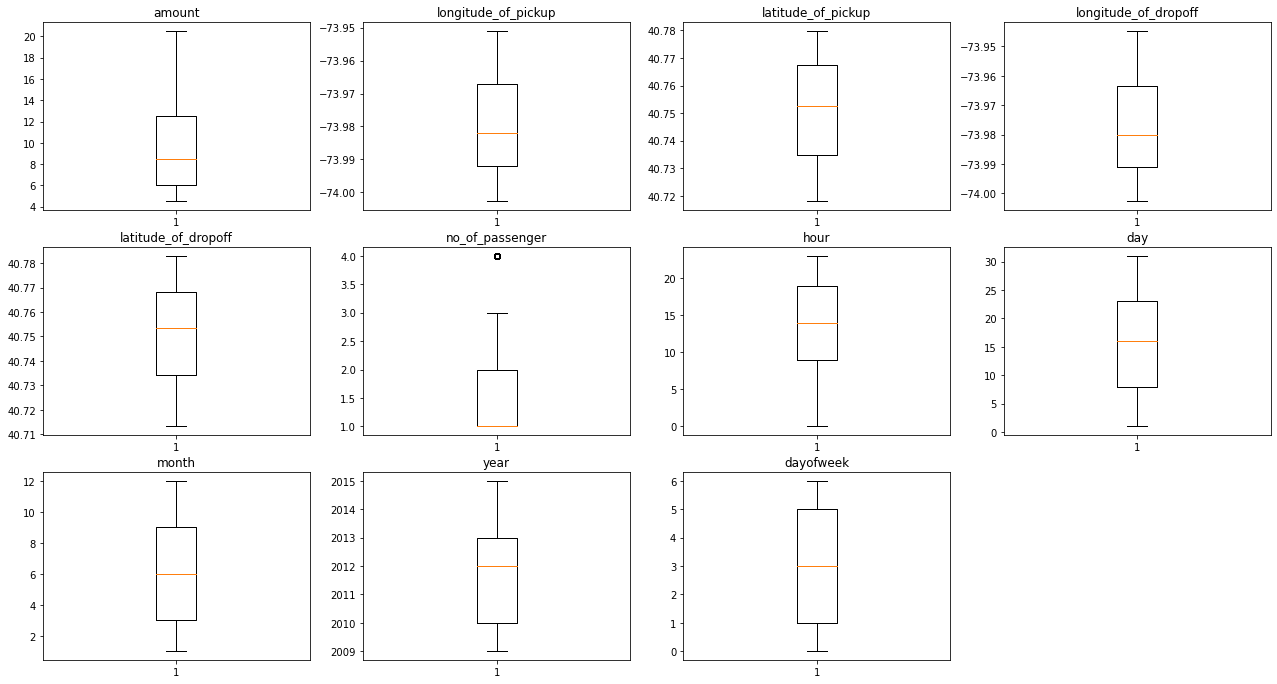

In [40]:
outliers=['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'hour', 'day', 'month', 'year', 'dayofweek', 'travel_dist_km']
plt.figure(figsize=(22,20))
for i in range(0,11):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[outliers[i]])
    plt.title(outliers[i])

In [41]:
df.shape

(50000, 12)

In [42]:
df.isna().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour                    0
day                     0
month                   0
year                    0
dayofweek               0
travel_dist_km          0
dtype: int64

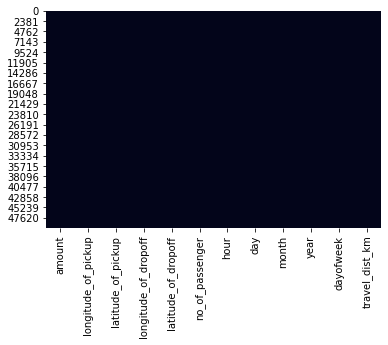

In [43]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [44]:
## spliting into independent variable and target variable
x = df.iloc[:, df.columns != 'amount']

# consider the target variable
y = df.iloc[:, df.columns == 'amount']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("The shape of X_train is:",x_train.shape)
print("The shape of X_test is:",x_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)


The shape of X_train is: (35000, 11)
The shape of X_test is: (15000, 11)
The shape of y_train is: (35000, 1)
The shape of y_test is: (15000, 1)


In [47]:

rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(x_train, y_train)

<ipython-input-47-cd165dcb04b6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

In [48]:
y_pred = rf_reg.predict(x_test)

In [49]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 1.4698333455555552
Mean Squared Error (MSE): 5.14189051540676
Root Mean Squared Error (RMSE): 2.267573706719753


In [50]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']
result_tabulation = pd.DataFrame(columns = cols)
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE})
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)
result_tabulation

Model       MAE       MSE      RMSE
0  Random Forest   1.469833  5.141891  2.267574

In [51]:
tuned_parameter=[{'n_estimators':[85,100],'min_samples_split':[20,25],'max_depth':[5,8]}]



In [52]:
rf_reg_cv=RandomForestRegressor(random_state=10)


In [53]:
CV_rfc = GridSearchCV(estimator=rf_reg_cv, param_grid=tuned_parameter, cv= 5)
CV_rfc.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid=[{'max_depth': [5, 8], 'min_samples_split': [20, 25],
                          'n_estimators': [85, 100]}])

In [54]:
CV_rfc_model=RandomForestRegressor(n_estimators=CV_rfc.best_params_.get('n_estimators'),max_depth=CV_rfc.best_params_.get('max_depth'),min_samples_split=CV_rfc.best_params_.get('min_samples_split'),random_state=10)
CV_rfc_model=CV_rfc_model.fit(x_train,y_train)


<ipython-input-54-e1910c88f0f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  CV_rfc_model=CV_rfc_model.fit(x_train,y_train)


In [55]:
y_pred=CV_rfc_model.predict(x_test)

In [58]:
# Calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)

# Calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)

# Calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 1.5084936725062614
Mean Squared Error (MSE): 5.279779465012081
Root Mean Squared Error (RMSE): 2.2977770703469216


In [60]:
rf_reg_metrics = pd.Series({'Model': "Random ForestCV ",
                     'MAE':rf_reg_CV_MAE,
                     'MSE': rf_reg_CV_MSE,
                     'RMSE': rf_reg_CV_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE
0    Random Forest   1.469833  5.141891  2.267574
1    Random Forest   1.508494  5.279779  2.297777
2  Random ForestCV   1.508494  5.279779  2.297777